<a href="https://colab.research.google.com/github/zxxiya/Stock-Price-Prediction-And-Forecasting-Using-Stacked-LSTM/blob/main/stockyzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [188]:
# import packages
import sys
import os
import urllib.request
import tarfile
import zipfile
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import datestr2num
import pandas_datareader.data as web
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from bs4 import BeautifulSoup
import requests
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import math

In [189]:
df = pd.read_csv("AAPLnew.csv")
df1=df.reset_index()['Close']

In [190]:
df1

0        34.947498
1        34.740002
2        34.945000
3        34.834999
4        34.880001
           ...    
1255    160.070007
1256    162.740005
1257    164.850006
1258    165.119995
1259    163.199997
Name: Close, Length: 1260, dtype: float64

In [191]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [192]:
print(df1)

[[1.88340002e-03]
 [4.75115456e-04]
 [1.86644179e-03]
 ...
 [8.83534758e-01]
 [8.85367179e-01]
 [8.72336107e-01]]


In [193]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [194]:
training_size,test_size

(1008, 252)

In [195]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [227]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [228]:
print(X_train.shape), print(y_train.shape)

(987, 20)
(987,)


(None, None)

In [229]:
print(X_test.shape), print(ytest.shape)

(231, 20)
(231,)


(None, None)

In [230]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [231]:
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [232]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 20, 32)            4352      
                                                                 
 lstm_30 (LSTM)              (None, 20, 32)            8320      
                                                                 
 lstm_31 (LSTM)              (None, 32)                8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [233]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
31/31 [==============================] - 6s 56ms/step - loss: 0.0086 - val_loss: 0.0022
Epoch 2/20
31/31 [==============================] - 1s 22ms/step - loss: 8.1678e-04 - val_loss: 0.0032
Epoch 3/20
31/31 [==============================] - 1s 24ms/step - loss: 7.3682e-04 - val_loss: 0.0027
Epoch 4/20
31/31 [==============================] - 1s 22ms/step - loss: 7.4769e-04 - val_loss: 0.0033
Epoch 5/20
31/31 [==============================] - 1s 22ms/step - loss: 7.4981e-04 - val_loss: 0.0074
Epoch 6/20
31/31 [==============================] - 1s 22ms/step - loss: 7.8337e-04 - val_loss: 0.0045
Epoch 7/20
31/31 [==============================] - 1s 22ms/step - loss: 7.4727e-04 - val_loss: 0.0066
Epoch 8/20
31/31 [==============================] - 1s 22ms/step - loss: 7.8823e-04 - val_loss: 0.0039
Epoch 9/20
31/31 [==============================] - 1s 22ms/step - loss: 7.0647e-04 - val_loss: 0.0037
Epoch 10/20
31/31 [==============================] - 1s 22ms/step - loss: 6.8

In [234]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [235]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [236]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

68.38481829487667

In [237]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

142.7155982284799

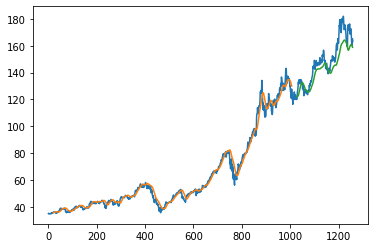

In [238]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [240]:
len(test_data)

252

In [241]:
x_input=test_data[232:].reshape(1,-1)
x_input.shape

(1, 20)

In [242]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [243]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<10):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8354461]
21
1 day output [[0.8314527]]
2 day output [[0.8270943]]
3 day output [[0.8223842]]
4 day output [[0.8174193]]
5 day output [[0.81230265]]
6 day output [[0.8071635]]
7 day output [[0.8020846]]
8 day output [[0.7970842]]
9 day output [[0.79218465]]
[[0.8354461193084717], [0.8314527273178101], [0.827094316482544], [0.8223841786384583], [0.8174192905426025], [0.8123026490211487], [0.8071634769439697], [0.8020846247673035], [0.7970842123031616], [0.7921846508979797]]


In [244]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [245]:
len(df1)

1260

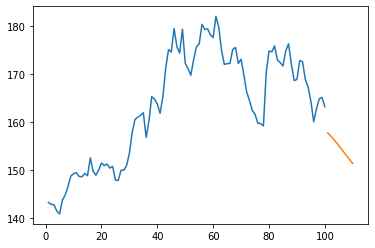

In [246]:
plt.plot(day_new,scaler.inverse_transform(df1[1160:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

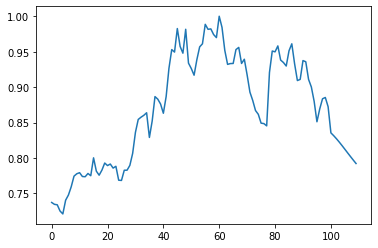

In [247]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1160:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

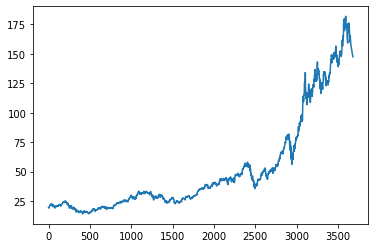

In [58]:
plt.plot(df3)